In [ ]:
!pip install scvi-tools

     |████████████████████████████████| 232 kB 5.2 MB/s 
     |████████████████████████████████| 713 kB 43.5 MB/s 
     |████████████████████████████████| 397 kB 44.4 MB/s 
     |████████████████████████████████| 217 kB 48.9 MB/s 
     |████████████████████████████████| 813 kB 38.9 MB/s 
     |████████████████████████████████| 91 kB 10.1 MB/s 
     |████████████████████████████████| 636 kB 46.2 MB/s 
     |████████████████████████████████| 829 kB 42.1 MB/s 
     |████████████████████████████████| 133 kB 14.7 MB/s 
     |████████████████████████████████| 1.1 MB 35.8 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 144 kB 45.9 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 38.2 MB/s 
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=d472447c23032e71e99a216cdc7425ae0104b3089b3faa6296c42

In [ ]:
import sys

#if branch is stable, will install via pypi, else will install from source
branch = "stable"
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB and branch == "stable":
    !pip install --quiet scvi-tools[tutorials]
elif IN_COLAB and branch != "stable":
    !pip install --quiet --upgrade jsonschema
    !pip install --quiet git+https://github.com/yoseflab/scvi-tools@$branch#egg=scvi-tools[tutorials]

     |████████████████████████████████| 8.8 MB 5.5 MB/s 
     |████████████████████████████████| 41 kB 111 kB/s 
     |████████████████████████████████| 1.4 MB 43.5 MB/s 
     |████████████████████████████████| 2.0 MB 40.3 MB/s 
     |████████████████████████████████| 48 kB 4.6 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 1.1 MB 45.6 MB/s 
     |████████████████████████████████| 3.1 MB 34.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scvi
import scanpy as sc
import tensorflow as tf

sc.set_figure_params(figsize=(4, 4))

Global seed set to 0
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/UMINTv2/Data_Labels/preprocessedData/cbmc8k')

['cbmc8k_rna_scaled.csv',
 'cbmc8k_rna.h5Seurat',
 'cbmc8k_rna.h5ad',
 'cbmc8k_adt_scaled.csv',
 'cbmc8k_adt.h5Seurat',
 'cbmc8k_adt.h5ad']

In [ ]:
dir = '/content/drive/MyDrive/UMINTv2/Data_Labels/preprocessedData/cbmc8k/'
dir1 = '/content/drive/MyDrive/UMINTv2/Data_Labels/Labels/'

In [ ]:
cbmc_rna = sc.read(dir+'cbmc8k_rna.h5ad')
cbmc_rna

AnnData object with n_obs × n_vars = 8617 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [ ]:
cbmc_adt = sc.read(dir+'cbmc8k_adt.h5ad')
cbmc_adt

AnnData object with n_obs × n_vars = 8617 × 10
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [ ]:
cbmc_rna.var.head()

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
A4GALT,0.003249,0.005793,0.003479,1.665042,1
ABCB10,0.021701,0.035393,0.024049,1.471666,1
ABCC3,0.009980,0.013132,0.010917,1.202855,1
ABCG2,0.002901,0.004054,0.003091,1.311317,1
ABI3,0.120344,0.161351,0.146596,1.100650,1


In [ ]:
temp_rna = cbmc_rna.X
temp_adt = cbmc_adt.X

scaling data to range 0-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
temp_rna = scaler.fit_transform(temp_rna)
temp_adt = scaler.fit_transform(temp_adt)

In [ ]:
# scvi needs one adata, so we merge rna and cite
adata = cbmc_rna
adata.layers["counts"] = temp_rna
adata.obsm['proteins'] = temp_adt

In [ ]:
adata

AnnData object with n_obs × n_vars = 8617 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'proteins'
    layers: 'counts'

In [ ]:
scvi.data.setup_anndata(adata, layer="counts", protein_expression_obsm_key='proteins')

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Using protein expression from adata.obsm['proteins']                                
INFO     Generating sequential protein names                                                 
INFO     Successfully registered anndata object containing 8617 cells, 2000 vars, 1 batches, 
         1 labels, and 10 proteins. Also registered 0 extra categorical covariates and 0     
         extra continuous covariates.                                                        
INFO     Please do not further modify adata until model is trained.                          


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vae = scvi.model.TOTALVI(adata)

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."
/usr/local/lib/python3.7/dist-packages/scvi/model/_totalvi.py:1041: UserWarning: Make sure the registered protein expression in anndata contains unnormalized count data.
  "Make sure the registered protein expression in anndata contains unnormalized count data."


In [ ]:
with tf.device('/GPU:0'):
  vae.train(max_epochs=100) #default value results in NaN

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/100:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scvi/distributions/_negative_binomial.py:533: UserWarning: The value argument must be within the support of the distribution
  UserWarning,


Epoch 100/100: 100%|██████████| 100/100 [02:09<00:00,  1.29s/it, loss=189, v_num=1]


In [ ]:
adata.obsm["X_totalVI"] = vae.get_latent_representation()

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."
/usr/local/lib/python3.7/dist-packages/scvi/model/_totalvi.py:1041: UserWarning: Make sure the registered protein expression in anndata contains unnormalized count data.
  "Make sure the registered protein expression in anndata contains unnormalized count data."


In [ ]:
sc.pp.neighbors(adata, use_rep="X_totalVI")
sc.tl.umap(adata, min_dist=0.4)
sc.tl.leiden(adata, key_added="leiden_totalVI")

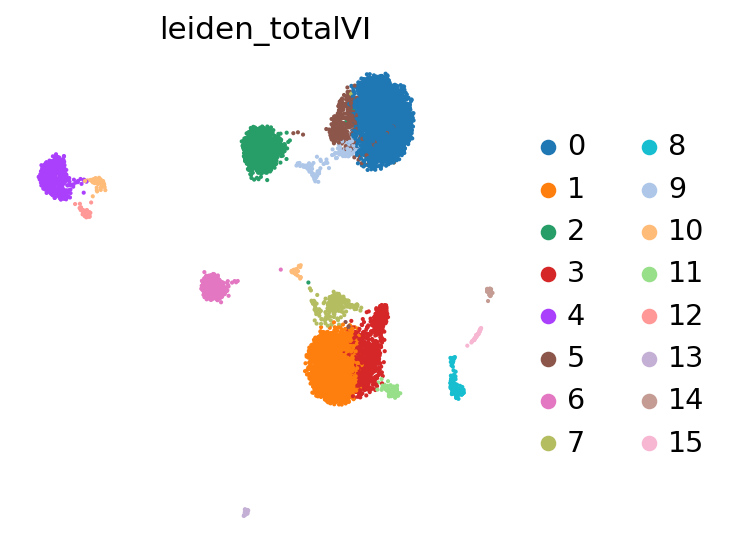

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden_totalVI"],
    frameon=False,
    ncols=1,
)

In [ ]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,_scvi_batch,_scvi_labels,leiden_totalVI
CTGTTTACACCGCTAG,0,18224.0,910,0,0,4
CTCTACGGTGTGGCTC,0,21210.0,1410,0,0,4
AGCAGCCAGGCTCATT,0,19970.0,1007,0,0,4
GAATAAGAGATCCCAT,0,21842.0,995,0,0,4
GTGCATAGTCATGCAT,0,17679.0,1046,0,0,4
...,...,...,...,...,...,...
TTGCCGTGTAGATTAG,0,1219.0,641,0,0,3
GGCGTGTAGTGTACTC,0,870.0,534,0,0,1
CGTATGCCGTCTTCTG,0,955.0,781,0,0,0
TACACGACGCTCTTCC,0,723.0,486,0,0,12


In [ ]:
cbmc8k_labels_totalVI = adata.obs['leiden_totalVI']

In [ ]:
cbmc8k_labels_totalVI.to_csv(dir1+'cbmc8k/cbmc8k_labels_totalVI.csv')